### Dataset Analysis

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('data/processed/retail_cleaned.csv')
df['TotalPrice'] = df['Quantity'] * df['Price']
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


In [3]:
# Basic info
print("Dataset shape:", df.shape)
print("\nData types:\n", df.dtypes)

Dataset shape: (700388, 9)

Data types:
 Invoice          int64
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID      int64
Country         object
TotalPrice     float64
dtype: object


In [4]:
# Summary statistics for numerical columns
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
             Invoice       Quantity          Price    Customer ID  \
count  700388.000000  700388.000000  700388.000000  700388.000000   
mean   537181.330550      12.182406       3.065463   15550.404903   
std     26975.837539     143.109933      25.598485    1592.453861   
min    489434.000000       1.000000       0.001000   12346.000000   
25%    514136.000000       2.000000       1.250000   14194.000000   
50%    536190.000000       4.000000       1.950000   15547.000000   
75%    561868.000000      12.000000       3.750000   16933.000000   
max    581586.000000   80995.000000   10953.500000   18287.000000   

          TotalPrice  
count  700388.000000  
mean       20.544662  
std       237.748856  
min         0.001000  
25%         4.250000  
50%        10.500000  
75%        17.850000  
max    168469.600000  


In [5]:
# Number of unique customers and products
print("\nUnique customers:", df['Customer ID'].nunique())
print("Unique products (StockCode):", df['StockCode'].nunique())


Unique customers: 5350
Unique products (StockCode): 4616


In [6]:
# Check date range
print("\nInvoice Date range:")
print(df['InvoiceDate'].min(), "to", df['InvoiceDate'].max())


Invoice Date range:
2009-12-01 07:45:00 to 2011-12-09 12:49:00


In [7]:
# Top 10 customers by total revenue
top_customers = df.groupby('Customer ID')['TotalPrice'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 customers by revenue:")
print(top_customers)


Top 10 customers by revenue:
Customer ID
18102    580987.04
17450    244784.25
13694    195640.69
17511    172132.87
16446    168472.50
16684    147142.77
15061    126389.02
16029    117763.62
17949    117314.08
15311    114966.42
Name: TotalPrice, dtype: float64


In [8]:
# Most popular products by quantity sold
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 products by quantity sold:")
print(top_products)


Top 10 products by quantity sold:
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     96736
WHITE HANGING HEART T-LIGHT HOLDER    84446
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        76919
ASSORTED COLOUR BIRD ORNAMENT         72577
BROCADE RING PURSE                    69714
JUMBO BAG RED RETROSPOT               67526
PACK OF 60 PINK PAISLEY CAKE CASES    44968
60 TEATIME FAIRY CAKE CASES           40144
SMALL POPCORN HOLDER                  39202
Name: Quantity, dtype: int64


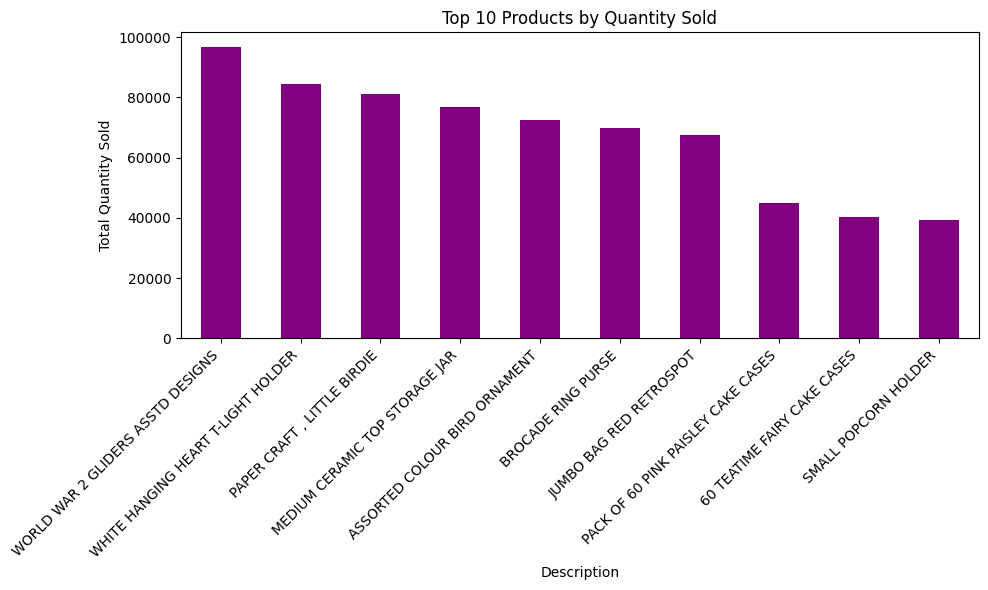

In [9]:
# Top 10 products by quantity sold (bar plot)
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
top_products.plot(kind='bar', color='purple')
plt.title('Top 10 Products by Quantity Sold')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

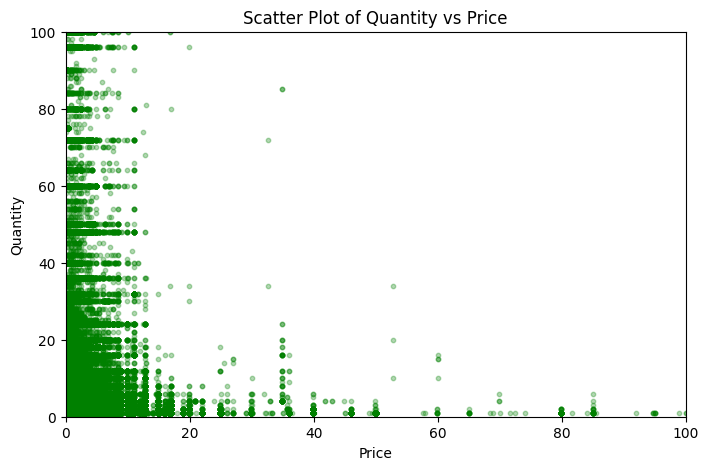

In [10]:
# Quantity vs Price scatter plot
plt.figure(figsize=(8,5))
plt.scatter(df['Price'], df['Quantity'], alpha=0.3, s=10, color='green')
plt.title('Scatter Plot of Quantity vs Price')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

### Model

Predicting Total Price

Mean Squared Error: 124.0428
R^2 Score: 0.3911


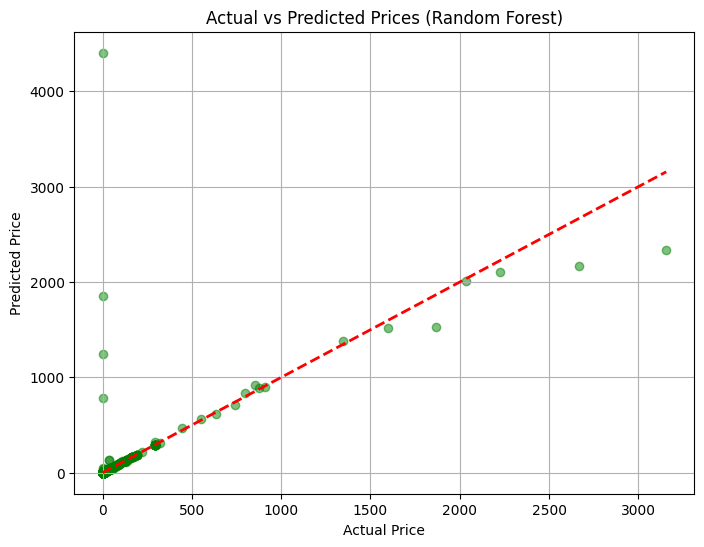

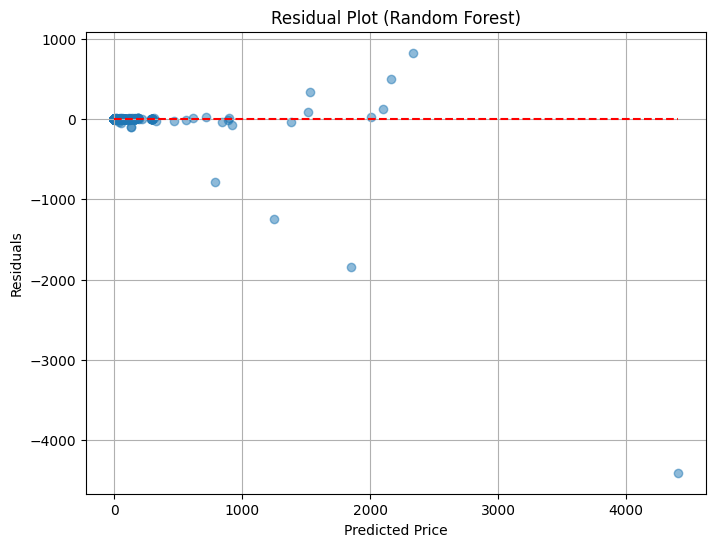

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load data
df = pd.read_csv('data/processed/retail_cleaned.csv')

# Convert InvoiceDate to datetime and extract hour
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceHour'] = df['InvoiceDate'].dt.hour

# Encode 
le_stock = LabelEncoder()
df['StockCode_enc'] = le_stock.fit_transform(df['StockCode'].astype(str))
le_stock = LabelEncoder()
df['Description_enc'] = le_stock.fit_transform(df['Description'].astype(str))

# Calculate TotalPrice if not present
df['TotalPrice'] = df['Quantity'] * df['Price']

# Features and target
X = df[['Customer ID', 'StockCode_enc', 'InvoiceHour', 'Description_enc', 'Quantity', 'TotalPrice']]
y = df[['Price']]

# Normalize target Price between 0 and 1
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)

# Scaling feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train
rf.fit(X_train, y_train.ravel()) 

# Predict
y_pred_scaled = rf.predict(X_test)

# Inverse transform predictions
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_orig = scaler_y.inverse_transform(y_test)

# Metrics
mse = mean_squared_error(y_test_orig, y_pred)
r2 = r2_score(y_test_orig, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Plot Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test_orig, y_pred, alpha=0.5, color='green')
plt.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Random Forest)")
plt.grid(True)
plt.show()

# Residual plot
residuals = y_test_orig - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='dashed')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot (Random Forest)")
plt.grid(True)
plt.show()
